# Fundamentals of Data Analysis

## Anscombe Quartet 

### Compiled by: Marco Men
#### Date of Last Commit : 11th November 2018


## Preface

This notebook is part of a Higher Diploma project. I was asked to do a project on *Anscombe quartet*. I hope this notebook will provide some further clarity on the impact and importance of graphical representation of statistical and data analysis.
After carrying my research and gathering information on this particular dataset, I soon realised that there are a lot of analysis on this dataset(perhaps for University programmes or just avid enthusiasts of "all things data").
The different analysis are easily repeated as no new material has been provided and the fact that this study has been done over decades. A lot of the analysis carried is based on the information on wikipedia page.
I came across one particular analysis that caught my attention and is the one I based this notebook. The reasons for basing my notebook on that particular analysis are:
* The notebook has logical flow
* Simple and enjoyable to read
* Made perfect sense in a logical manner

Of course, the three reasons mentioned above would have not constitute sufficient plausible arguments for basing this notebook on. I had to cross reference its sources of information and conduct due dilligence to verify the validity of its statements(which I thouroughly did).

There was only one minor issue. The notebook( https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html ) was written in RMD(R MarkDown). 
"There is absolutely nothing to worry. If someone can write in R, surely someone else can write in Python"- This is what I think.
I just had to adjust and adapt my code to suit my "Pythonic needs"
And so I began...

## Introduction


![Frank_Anscombe](https://raw.github.com/MarcoMen-Temp/Fundamentals-Practice/master/PicTest/Frank_Anscombe.jpeg "Frank_Anscombe")

Frank Anscombe was an English statistician,that became interested in statistical computing. He created the 'Anscombe Quartet' dataset(a compilation of four mini datasets) to ilustrate the importance of graphs in statistical analysis.
In this notebook, I seek to illustrate Anscombe's point, that there are several pitfalls in over reliance in numerical data analysis and how by visualising data certain issues can be easily identified and properly addressed.


In [1]:
# Libraries used in this notebook

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# anscombe DS can be found in seaborn library

quartet = sns.load_dataset('anscombe')

print(quartet)


   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

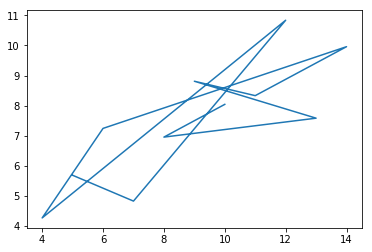

In [3]:
# subset per DS 
# can also be done with group_by function
# the default behaviour of matplotlib is to draw lines
# "connecting the dots"

ds_1 = quartet[quartet['dataset'] == 'I']

plt.plot(ds_1 ['x'], ds_1['y'])

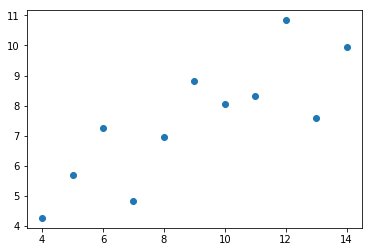

In [4]:
# to draw points as 'o'

plt.plot(ds_1['x'], ds_1['y'], 'o')

In [5]:
# creating subsets of anscombe data

ds_2 = quartet[quartet['dataset'] == 'II']

ds_3 = quartet[quartet['dataset'] == 'III']

ds_4 = quartet[quartet['dataset'] == 'IV']

In [6]:
print(ds_4)

   dataset     x      y
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


In [7]:
ds_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,4.00,6.500,9.00,11.50,14.00
y,11.0,7.500909,2.031568,4.26,6.315,7.58,8.57,10.84


In [8]:
ds_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,4.0,6.500,9.00,11.50,14.00
y,11.0,7.500909,2.031657,3.1,6.695,8.14,8.95,9.26


In [9]:
ds_3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.0,3.316625,4.00,6.50,9.00,11.50,14.00
y,11.0,7.5,2.030424,5.39,6.25,7.11,7.98,12.74


In [10]:
ds_4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,8.00,8.00,8.00,8.00,19.0
y,11.0,7.500909,2.030579,5.25,6.17,7.04,8.19,12.5


Based on the results of the summary of descriptive statistics of the 4 datasets above,the following observations can be seen:
    
* All 4 have the same number of observations(11 rows);
* The 4 datasets have the same mean results for both columns( x and y );
* The 4 datasets have the same standard deviations' results

In [11]:
# Performing a simple linear regression

model1 = smf.ols(formula= 'y ~ x', data=ds_1)

model2 = smf.ols(formula= 'y ~ x', data=ds_2)

model3 = smf.ols(formula= 'y ~ x', data=ds_3)

model4 = smf.ols(formula= 'y ~ x', data=ds_4)

In [12]:
# Now the data can be fitted to each model

result1 =model1.fit()

result2 =model2.fit()

result3 =model3.fit()

result4 = model4.fit()

In [13]:
# print the summary of  the models for each DS
# Also the confidence interval
result1.summary()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Mon, 05 Nov 2018   Prob (F-statistic):            0.00217
Time:                        21:09:46   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear equation: y=mx+b. Where **m** is the coefficient of x( this value provides the *slope* of the line ), and **b** is the coefficient of y intercept( this is the value of *y* when *x* is 0 ). If we replace the variables by the numerical values above, we get the following **equation of linear regression**:
* y = (0.5001)x + 3.0001.

The same rule is applied on the sub datasets below. We should seek the **parameters of the equation**(which are on the line below Covariance Type, with the heading **coef** for both the *Intercept* and *x*.

Since all the models present the similar(approx.) values,they result on the same equation. So all 4 datasets should be represented linear, with a positive correlation

In [14]:
result2.summary()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 05 Nov 2018   Prob (F-statistic):            0.00218
Time:                        21:09:46   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The **equation of regression line** for the model above will be: y = (0.5000)x + 3.0009 (linear positive).

In [15]:
result3.summary()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 05 Nov 2018   Prob (F-statistic):            0.00218
Time:                        21:09:46   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
x              0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The **equation of regression line** for the model above is:
* y= (0.4997)x + 3.0025 (Again, linear and positive correlation)

In [16]:
result4.summary()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Mon, 05 Nov 2018   Prob (F-statistic):            0.00216
Time:                        21:09:46   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x              0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the model above the **equation of regression line** is represented by :
* y = (0.4999)x + 3.0017 (Linear and positive correlation)

## Conclusion


As a reminder of the linear equation: **y = mx + b**. From the models displayed, all are represented by linear equations        ( positive correlation ) with similar patterns,because the y-intercept is positive. Since all the models present relatively aproximated values to each other,they should provide similar equations. So all 4 datasets should be represented by a linear ( positive ) correlation with similar slope( of 5) and intercepts( of 3 ). Direct correlation as oppose to inverse(which would be negative).
We can conclude from our analysis that there is a correlation between the four data sets, as they present similar results in there descriptive statistics and the show quite approximated values on their linear regression models. But wait, aren't the values ( from the sub datasets ) used to create descriptive statistics the same ones used in calculating the linear regression models? Yes, they are. So naturally they will yield similar results. And,didn't Frank Anscombe warned statiticians of his time on the dangers of over reliance on analysis of numerical data? I believe he did. So, why am I falling for this trap. I should follow his advice and start plotting.

Let's start plotting, to reinforce the numerical results ( above ) and prove that I am right on my conclusions.  "That the numbers do not lie!" 

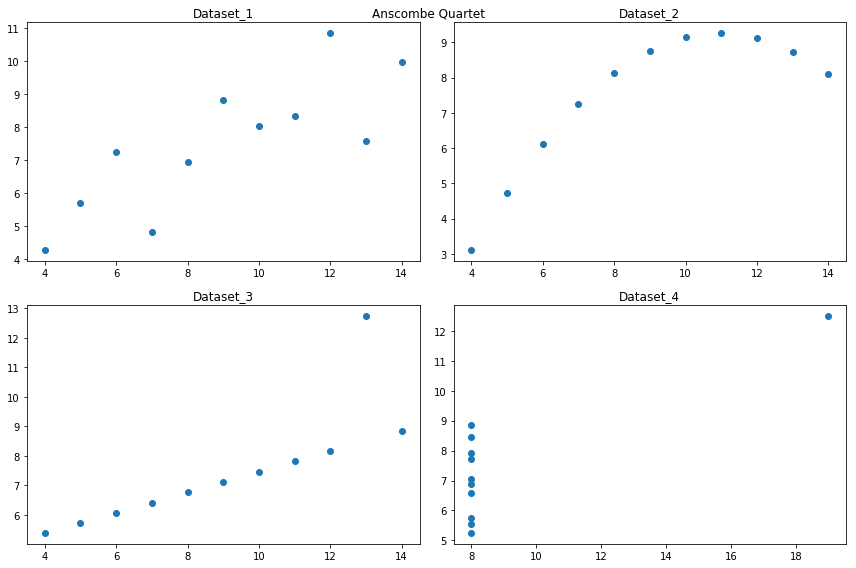

In [17]:


# create the fig where the subplots will be represented
fig = plt.figure(figsize=(12,8))


# how subplots will be laid out(2 rows x 2 plots each row)

# subplot has 2 rows and 2 columns,plot location 1
axes1 = fig.add_subplot(2,2,1)

# subplot has 2 rows and 2 columns,plot location 2
axes2 = fig.add_subplot(2,2,2)

# subplot has 2 rows and 2 columns.plot location 3
axes3 = fig.add_subplot(2,2,3)

# subplot has 2 rows 2 columns,plot location 4
axes4 = fig.add_subplot(2,2,4)

# add a plot to each of the axes created above

axes1.plot(ds_1['x'],ds_1['y'],'o')
axes2.plot(ds_2['x'],ds_2['y'],'o')
axes3.plot(ds_3['x'],ds_3['y'],'o')
axes4.plot(ds_4['x'],ds_4['y'],'o')

# add a small title to each subplot

axes1.set_title('Dataset_1')
axes2.set_title('Dataset_2')
axes3.set_title('Dataset_3')
axes4.set_title('Dataset_4')

# add title to the entire figure

fig.suptitle('Anscombe Quartet')

# use a tight_layout

fig.tight_layout()

Uh!! Oh, Oh! 
What happened? And how? 
This does not make sense! There should have been 4 plots with linear representation with positive correlation.

I better do some regression plots with residuals, to see the distance between the fitted linear regression is from the scattered points. Also, to visualise how disperse they are.

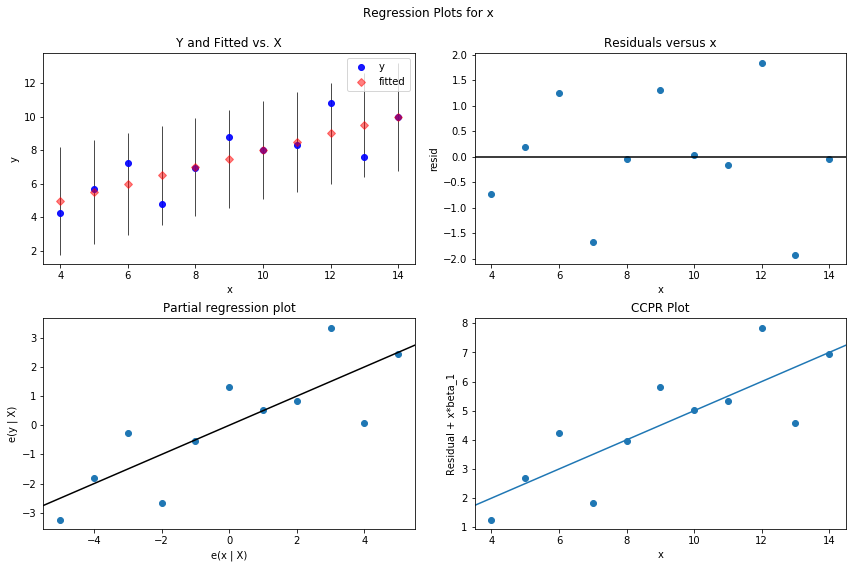

In [18]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result1, "x", fig=fig)

plt.show()

### Dataset_1

This graph shows a linear representation of the dataset_1('I'). By the equation mentioned above(y=mx + b), this graph would be considered a normal representation of the theoretical values( more specifically the equation of linear regression ).

The model above shows a normal fitted linear regression with all the observations evenly dispersed and distanced from the line. There are no outliers

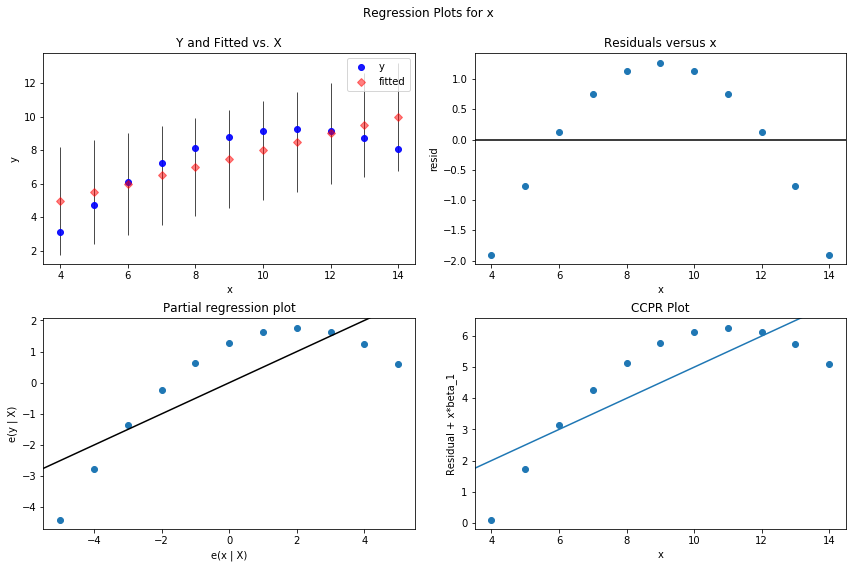

In [19]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result2, "x", fig=fig)

plt.show()

### Dataset_2

This graph appears to represent a quadratic function,as it behaves like an hyperbole(y=ax** 2 + bx + c) and is not a normal,but rather forceful representation of the linear regression model.
Looking at the residuals' plots depicted above, this dataset('II') is a clear example of **underfitted** data model ( with high bias ).

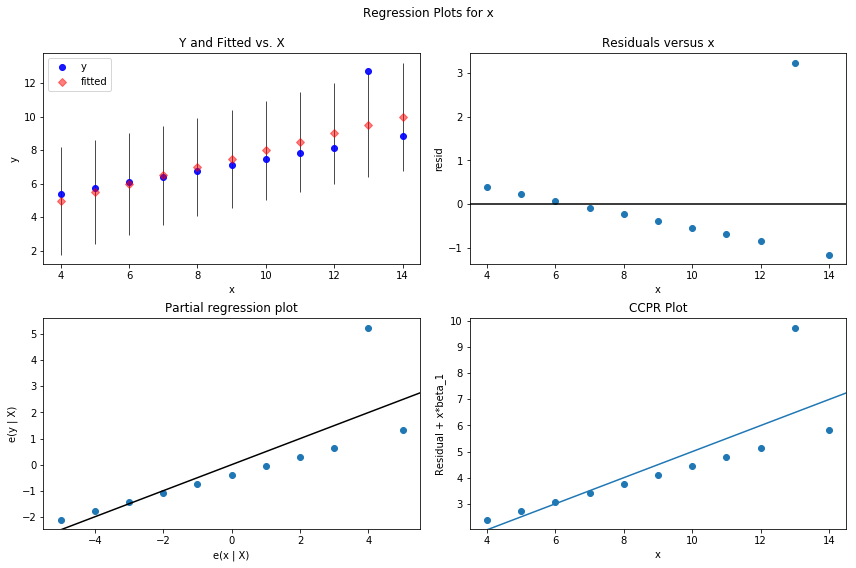

In [20]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result3, "x", fig=fig)

plt.show()


### Dataset_3

The model depicted above does not conform with the summary of calculations above ( for the linear regression y= 0.4997x + 3.0025 ). And there is one observation that is positioned far from the linear regression line. 
Could be a linear representation, if not for the clear  **outlier**(note below)

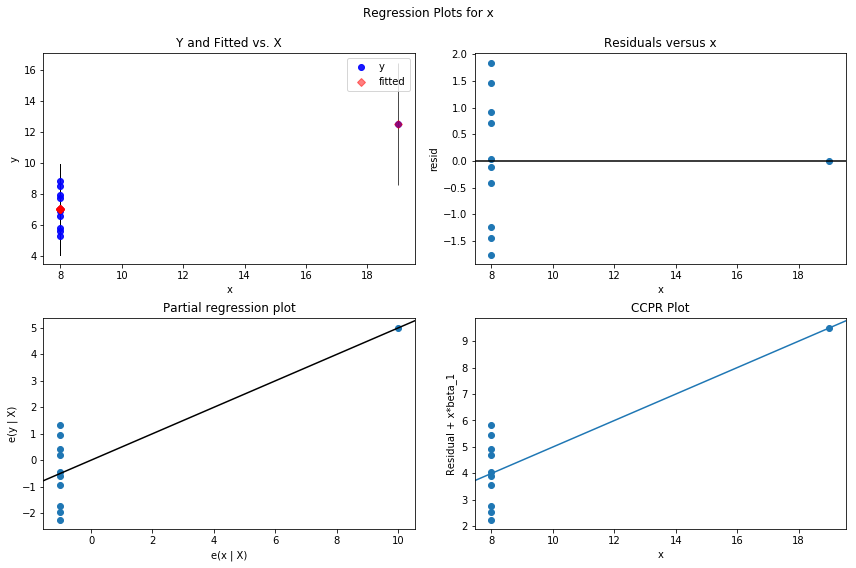

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result4, "x", fig=fig)

plt.show()


### Dataset_4

Again,if not for the *outlier*, this dataset would have been a representation of  **x is constant**. There would not be a y-intercept if not for the outlier. It looks like a constant( with value of 8 ) x variable, forming a vertical parallel line with the y-axis.

10 of the observations,take x=8 and the outlier(x=19). The outlier is far distanced from the rest of the grouped data and if removed would depict a different graph(without any intercept).



## Interpretation of Data Visualisation

If we analyse the plots and their residual regression plots for 'x' ( dependent variable ) for the different models, we can reinforce our opinion on the different patterns of each dataset. The scattered points are spread and skewed differently.
Dataset_1 is the only that presents  linear properties,closely related with the linear regression equation.
Dataset 2 has quadratic patterns(two different x values have the same y value). For x = 9 and 13, y ~= 9. The linear regression line tries to forcefully(through **high level of bias**) spread the observations evenly, but ends up underfitting the model
It becomes clear the effect the outliers have on datasets  3, 4 in trying to fit a linear pattern to each dataset.




### Outliers
Because of the outliers, datasets 3 and 4 show misleading results. The interpretation of the numerical data ( solely ) may lead the analyst towards wrong conclusions. But what are outliers and what should we do about them?
The definition, an ***outlier** is an observation that lies outside the overall pattern of the distribution(Moore and McCabe 1999)*. Usually,the presence of an outlier indicates some sort of problem. This can be a case which does not fit the model under study, or an error in measurement. **Outliers** can also occur when comparing relationships between two sets of data. They are easily spotted through several data visualisation graphs(histograms,scatterplots,etc.)

When performing least squares fitting to data, it is often best to discard outliers before computing the line of best fit. This is particularly true of outliers along the x direction, since these points may greatly influence the result.
(http://mathworld.wolfram.com/Outlier.html). This last sentence is particularly relevant to Anscombe's quartet dataset.

But, what if the outlier is necessary for the dataset? What if,by removing an outlier another one will emerge?
We must first get an understanding of what the outlier represents, how it was created and how does it affect the dataset, before removing it.

Anscombe, conducted an analysis on US state public schools per-capita expenditure,in which he identified Alaska as having outlying pattern compared to other States' schools. Removing the data from the Alaska state will make the data shift and create another outlier. If he would have kept removing it,he would be left with no data to analyse. The solution was to analyse the data with Alaska and then without it, to see if any major changes to the results have occured. In this study, he concluded that there was inequalities amongst different States in public schools expenditures per capita. He probably would have not reached such conclusion,if Alaska would have been removed ( Also, the removal of Alaska might have been considered bias of raw data ).

But, in more recent publications such as "Think Stats - Probability and Statistics for Programmers" by Allen B. Downey, Downey shares similar opinion to Anscombe regarding outliers ( gain an understanding of the outliers and its effects before discarding them ).


In the quartet, we do not know what the outliers represent. But we do know that they affect the overall results. So we should further investigate them, once identified through plotted graphs.
First, I am going to plot some histograms with density plots to see the pattern of the data distribution on each subeset, and then I will run model diagnostics on our data using residuals and QQ plots to see how well our data(models) is fitted(the distance from the regression line.

## How the Quartet was created

No one seems to know how this dataset was created. There is some speculation, which is irrelevant. The main point is that since the creation of this dataset, many similar datasets were invented.
In his 'Graphs of Statistical Analysis', Anscombe points us to the fact that in the first 3 datasets('I', 'II', 'III'), the *x-values* are identical.

## Conclusion

My goal in this notebook was to present a simple, with logical flow and enjoyable read material. But above all, provide accurate informative content. I hope I achieve this.

My main objective was to reinforce Anscombe's view, that when performing statistical and data analysis both, numerical and visual data should be presented. This is to avoid any misrepresentations of data or to provide some more clarity on the data. Where outliers are present or the interpretations of numerical data based on preconceived assumptions, data visualisation can provide complementary information on the analysis.

## References & Lit. Review

'Pandas For Everyone' - Daniel Y. Chen

[matplotlib.org](https://matplotlib.org/)

[statsmodels.org](https://www.statsmodels.org/stable/index.html)

https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html

https://en.wikipedia.org/wiki/Frank_Anscombe

Anscombe, Francis J. (1973) ['Graphs in statistical analysis. American Statistician'](http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf), 27, 17–21.

